<a href="https://colab.research.google.com/github/JHayhow/Project-1-Global-and-Local-Temperatures/blob/main/Project_1_Udacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Relevant SQL Code for pulling the data:

Select * from global_data;

Select * from city_list
where country='United Kingdom';

Select * from city_data
where country='United Kingdom' and city='London';

Importing the Temperature Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
London_Temperatures = pd.read_csv('London Temp Data.csv')
y = London_Temperatures.iloc[:,-1].values

In [3]:
London_Temperatures.head()

,year,city,country,avg_temp,12-year moving average
0,1743,London,United Kingdom,7.54,NaN
1,1744,London,United Kingdom,10.34,NaN
2,1745,London,United Kingdom,4.13,NaN
3,1746,London,United Kingdom,NaN,NaN
4,1747,London,United Kingdom,NaN,NaN


In [4]:
London_Temperatures.tail()

,year,city,country,avg_temp,12-year moving average
266,2009,London,United Kingdom,10.52,10.659167
267,2010,London,United Kingdom,9.38,10.574167
268,2011,London,United Kingdom,11.19,10.601667
269,2012,London,United Kingdom,10.00,10.558333
270,2013,London,United Kingdom,9.91,10.535833


In [5]:
moving_av_london = London_Temperatures['12-year moving average']
year = London_Temperatures['year']

In [6]:
moving_av_london = moving_av_london.iloc[12:]

In [7]:
moving_av_london.head()

12    8.602500
13    8.487500
14    9.138750
15    9.106667
16    9.176000
Name: 12-year moving average, dtype: float64

In [8]:
global_data = pd.read_csv('global_data.csv')
#Cutting off last two rows of Global Data so that the years match
global_data=global_data[:-2]
moving_av_global = global_data['12-year moving average']
years = global_data['year']

In [9]:
global_data.head()

,year,avg_temp,12-year moving average
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN


In [10]:
global_data.tail()

,year,avg_temp,12-year moving average
259,2009,9.51,9.478333
260,2010,9.70,9.493333
261,2011,9.52,9.512500
262,2012,9.51,9.538333
263,2013,9.61,9.555000


In [11]:
moving_av_global.tail()

259    9.478333
260    9.493333
261    9.512500
262    9.538333
263    9.555000
Name: 12-year moving average, dtype: float64

In [12]:
moving_av_global.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 12-year moving average, dtype: float64

In [13]:
moving_av_global = moving_av_global.iloc[12:]

In [14]:
moving_av_global.head()

12    8.012500
13    7.972500
14    8.190833
15    8.179167
16    8.174167
Name: 12-year moving average, dtype: float64

In [15]:
years = years.iloc[12:]

In [16]:
moving_av_global.shape

(252,)

In [17]:
years.shape

(252,)

In [18]:
moving_av_london.shape

(259,)

In [19]:
# As the london moving averages begin 7 years before the global moving averages
# we need to cut the first seven rows
moving_av_london = moving_av_london.iloc[7:]
moving_av_london.shape

(252,)

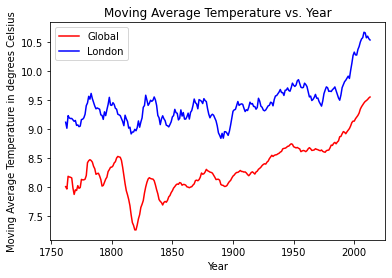

In [20]:
plt.plot(years,moving_av_global,color='r',label='Global')
plt.plot(years,moving_av_london,color='b',label='London')
plt.title('Moving Average Temperature vs. Year')
plt.ylabel('Moving Average Temperature in degrees Celsius')
plt.xlabel('Year')

plt.legend()
plt.show()

Calculating the maximum, minimum, mean, variance and standard deviations of the moving average temperatures:

In [21]:
london_std = np.std(moving_av_london)
print(london_std)

0.35319704951023656


In [22]:
global_std = np.std(moving_av_global)
print(global_std)

0.4263603405643366


In [23]:
print(np.mean(moving_av_london))
print(np.mean(moving_av_global))

9.447559523880951
8.342258597876985


In [24]:
print("The variance in London's local temperature is:", london_std**2)
print("The variance in global temperature is:", global_std**2)

The variance in London's local temperature is: 0.1247481557827365
The variance in global temperature is: 0.18178314000613707


In [25]:
print("The max London temperature was:", max(moving_av_london))
print("The minimum London temperature was:", min(moving_av_london))
print("The max global temperature was:", max(moving_av_global))
print("The minimum global temperature was:", min(moving_av_global))

The max London temperature was: 10.66916667
The minimum London temperature was: 8.844166667
The max global temperature was: 9.555
The minimum global temperature was: 7.268333332999999


Graphing the Changes in Temperature

In [26]:
#Finding the changes in temperature each year
london_temp_change = np.diff(moving_av_london)
global_temp_change = np.diff(moving_av_global)
#Getting rid of the first recorded year because no change can be observed
years = years[1:]

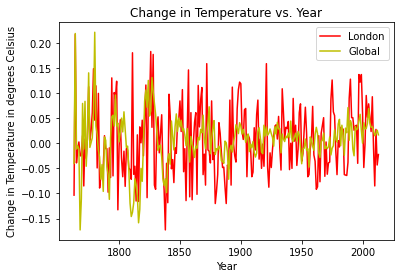

In [27]:
plt.plot(years,london_temp_change,label='London',color='r')
plt.plot(years,global_temp_change,label='Global',color='y')
plt.title('Change in Temperature vs. Year')
plt.ylabel('Change in Temperature in degrees Celsius')
plt.xlabel('Year')
plt.legend()
plt.show()

Graphing the differences in temperature between London and the globe for a given year

In [28]:
moving_av_global_array = moving_av_global.to_numpy()

In [29]:
moving_av_london_array = moving_av_london.to_numpy()

In [30]:
difference = np.subtract(moving_av_global_array,moving_av_london_array)

In [31]:
years_array = years.to_numpy()

In [32]:
year_1750 = np.append(1750,years_array)

In [33]:
print(year_1750)

[1750 1763 1764 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775
 1776 1777 1778 1779 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789
 1790 1791 1792 1793 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803
 1804 1805 1806 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817
 1818 1819 1820 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831
 1832 1833 1834 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845
 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859
 1860 1861 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873
 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887
 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901
 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915
 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929
 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943
 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957
 1958 

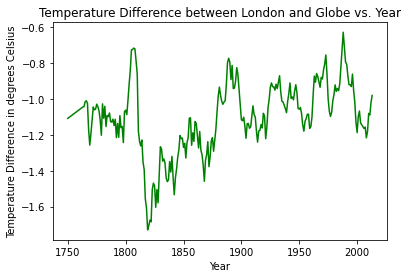

In [34]:
plt.plot(year_1750,difference,color='g')
plt.title('Temperature Difference between London and Globe vs. Year')
plt.xlabel('Year')
plt.ylabel('Temperature Difference in degrees Celsius')
plt.show()

In [50]:
#Calculate the standard deviation of the temperature differences
difference_std = np.std(difference)
print(difference_std)

0.19860650553136494


In [51]:
print(np.mean(difference))
print(max(difference))
print(min(difference))
print(difference_std**2)

-1.1053009260039681
-0.6283333329999987
-1.7300000000000004
0.039444544039380094


See extra challenges in the criteria to make this project stand out!

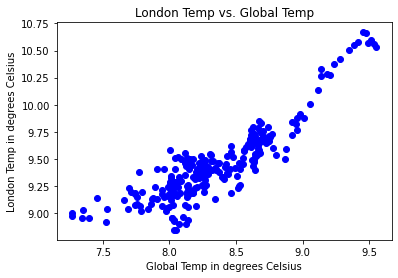

In [35]:
# See if the temperatures follow a linear relationship:

plt.scatter(moving_av_global,moving_av_london, color='b')
plt.title('London Temp vs. Global Temp')
plt.ylabel('London Temp in degrees Celsius')
plt.xlabel('Global Temp in degrees Celsius')
plt.show()

Now use the data to fit a straight line and make some predictions. Use LinearRegression and calculate the coefficient of correlation

In [36]:
#Checking for nans
np.any(np.isnan(moving_av_global))

False

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
moving_av_global_array = imputer.fit_transform(moving_av_global_array.reshape(-1,1))

In [38]:
np.any(np.isnan(moving_av_global_array))

False

In [39]:
np.any(np.isnan(moving_av_london_array))

False

In [40]:
moving_av_global_array.flatten().shape

(252,)

In [41]:
moving_av_london_array.shape

(252,)

In [42]:
correlation_coefficient = np.corrcoef(moving_av_global_array.flatten(),moving_av_london_array)
print("The correlation coefficient is:",correlation_coefficient[0][1])

The correlation coefficient is: 0.8868057150159281


Create a prediction of the local temperature given the global temperature:

In [43]:
X = moving_av_london_array.reshape(-1,1)
y = moving_av_global_array.reshape(-1,1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred = linreg.predict(X_test)

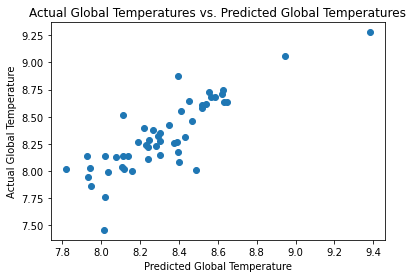

In [46]:
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted Global Temperature')
plt.ylabel('Actual Global Temperature')
plt.title('Actual Global Temperatures vs. Predicted Global Temperatures')
plt.show()

In [47]:
#Evaluate these predictions
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = mse**0.5
print(rmse)

0.17899612712740529


In [48]:
print(np.std(X))
print(np.std(y))

0.3531970495102366
0.4263603405643366


In [49]:
#Make some predictions
linreg.predict([[10.0]])

array([[8.93171152]])